# **YOLO_NAS_Object_Detection for Efficient Object Detection**

**Step 1: Set Up Runtime and Install Packages**

Set Runtime to GPU

Open your Google Colab notebook.

Click on "Runtime" in the menu.

Select "Change runtime type".

Under "Hardware accelerator", choose "T4 GPU".

Click "Save"

Now install libraries

In [ ]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade
!pip install wandb

**Step 02: Importing Required Libraries**

In [ ]:
pip install super_gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.7 MB/s eta 0:00:00
  Using cached boto3-1.34.122-py3-none-any.whl (139 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached coverage-5.3.1-cp310-cp310-linux_x86_64.whl
  Using cached Sphinx-4.0.3-py3-none-any.whl (2.9 MB)
  Using cached sphinx_rtd_theme-2.0.0-py2.py3-none-any.whl (2.8 MB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.2 MB/s eta 0:00:00
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached stringcase-1.2.0-py3-none-any.whl
  Using c

**Restart the Run Time**

In [ ]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

The console stream is logged into /root/sg_logs/console.log


[2024-06-08 17:37:33] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-06-08 17:37:47] INFO - utils.py - NumExpr defaulting to 2 threads.


In [ ]:
from IPython.display import clear_output

In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [ ]:
from super_gradients.training import models

**Step 03: Setting Up Checkpoint Directory and Instantiating Trainer**

In [ ]:
CHECKPOINT_DIR = 'checkpoints1'
trainer = Trainer(experiment_name='ppe_yolonas_run1', ckpt_root_dir=CHECKPOINT_DIR)

**Step 04: Exporting the Dataset from Roboflow into the Google Colab Notebook**

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="szYX2UE6vtX0SIGgaZLh")
project = rf.workspace("muhammadmoin-y1qrz").project("retail-store-axhqk")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to Retail-Store-1 in yolov8::   0%|          | 0/2138 [00:00<?, ?it/s]

Extracting Dataset Version Zip to Retail-Store-1 in yolov8::  73%|███████▎  | 1562/2138 [00:00<00:00, 2648.66it/s]

**Step 05: Load your dataset parameters into a dictionary**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

You'll need to load your dataset parameters into a dictionary, specifically defining:

- path to the parent directory where your data lives
- the child directory names for training, validation, and test (if you have testing set) images and labels
- class names

In [ ]:
dataset_params = {
    'data_dir':'/content/Retail-Store-1',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Apples', 'Banana', 'Bun', 'Cabbage', 'Cold Drink', 'Dry Fruit', 'Eggs', 'Grapes', 'Green Seeds', 'Milk', 'Oil', 'Pineapple', 'Snacks', 'Vegetables', 'Water Bottle', 'bell pepper', 'bread', 'carrot', 'cucumber', 'fasol', 'garlic', 'hot pepper', 'onion', 'peas', 'salad', 'tin', 'tomato']
}


**Step 06: Pass the values for dataset_params into the dataset_params argument as shown below.**

In [ ]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

Indexing dataset annotations: 100%|██████████| 111/111 [00:00<00:00, 3430.68it/s]


**Step 07: Inspect the Dataset Defined Earlier**

In [ ]:
train_data.dataset.transforms

In [ ]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [ ]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

**Step 08: Plot a batch of training data with their augmentations applied to see what they look like**

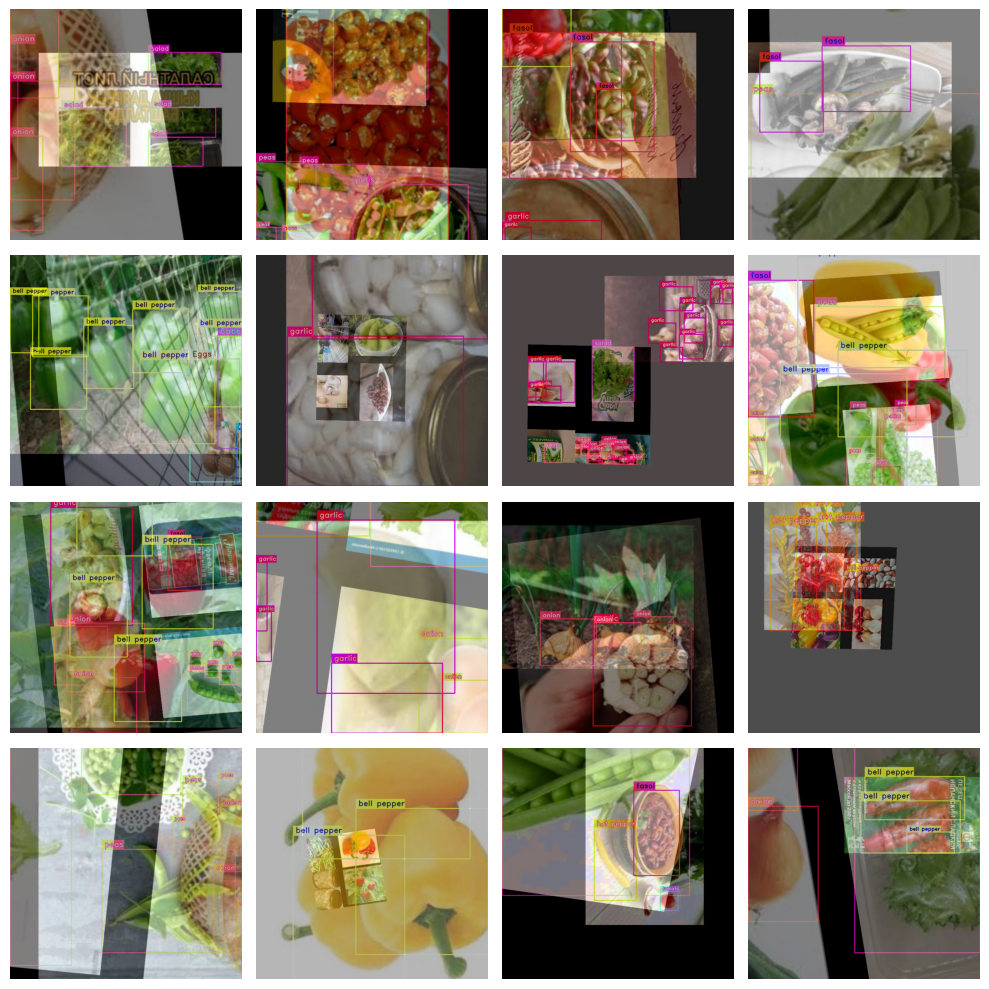

In [ ]:
train_data.dataset.plot()

**Step 09: Instantiating the model**

In [ ]:
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2024-06-08 17:45:34] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-06-08 17:45:34] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:05<00:00, 13.7MB/s]
[2024-06-08 17:45:40] INFO - checkpo

**Step 10: Define metrics and training parameters**

In [ ]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 10,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

Step 11: Training the model

In [ ]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2024-06-08 17:46:14] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240608_174614_658144`
[2024-06-08 17:46:14] INFO - sg_trainer.py - Checkpoints directory: checkpoints1/ppe_yolonas_run1/RUN_20240608_174614_658144
[2024-06-08 17:46:14] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to checkpoints1/ppe_yolonas_run1/RUN_20240608_174614_658144/console_Jun08_17_46_14.txt


Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
[2024-06-08 17:46:22] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            856        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_s

**Step 12: Get the best trained model**

In [ ]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/checkpoints1/ppe_yolonas_run1/RUN_20240608_174614_658144/ckpt_best.pth")

[2024-06-08 18:05:31] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints1/ppe_yolonas_run1/RUN_20240608_174614_658144/ckpt_best.pth EMA checkpoint.


**Step 13: Evaluating the best trained model on the test set**

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]


{'PPYoloELoss/loss_cls': 1.0943844,
 'PPYoloELoss/loss_iou': 0.44211188,
 'PPYoloELoss/loss_dfl': 0.5902772,
 'PPYoloELoss/loss': 2.1267736,
 'Precision@0.50': 0.02753206342458725,
 'Recall@0.50': 0.6994540691375732,
 'mAP@0.50': 0.4516963064670563,
 'F1@0.50': 0.05255609750747681,
 'Best_score_threshold': 0.4699999988079071}

**Step 14: Predicting with the best model**

[2024-06-08 18:12:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


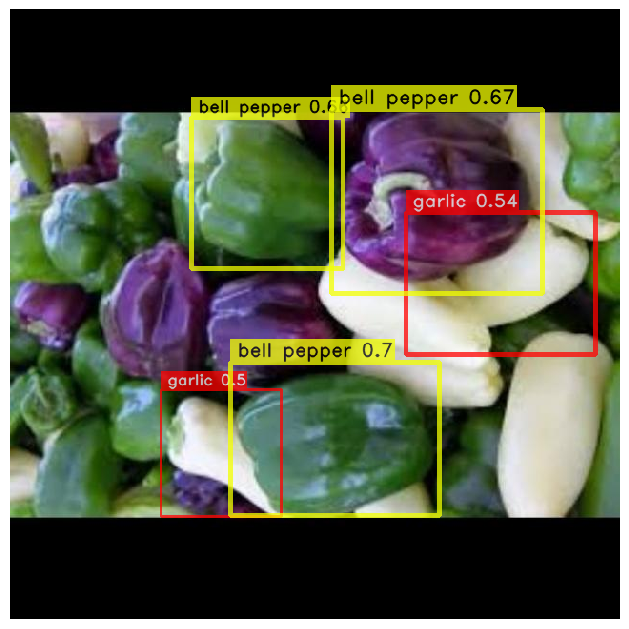

In [ ]:
img_url = '/content/Retail-Store-1/test/images/-11_jpg.rf.b9d9e5829f524ccb1e197fbe937793a5.jpg'
best_model.predict(img_url).show()

[2024-06-08 18:12:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


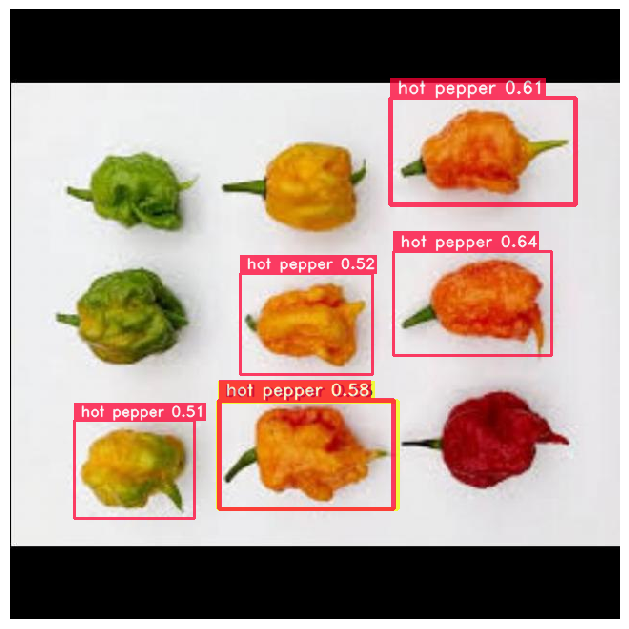

In [ ]:
img_url = '/content/Retail-Store-1/test/images/-23_jpg.rf.b197a1a178182f33954544e6d90e3703.jpg'
best_model.predict(img_url).show()

[2024-06-08 18:12:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


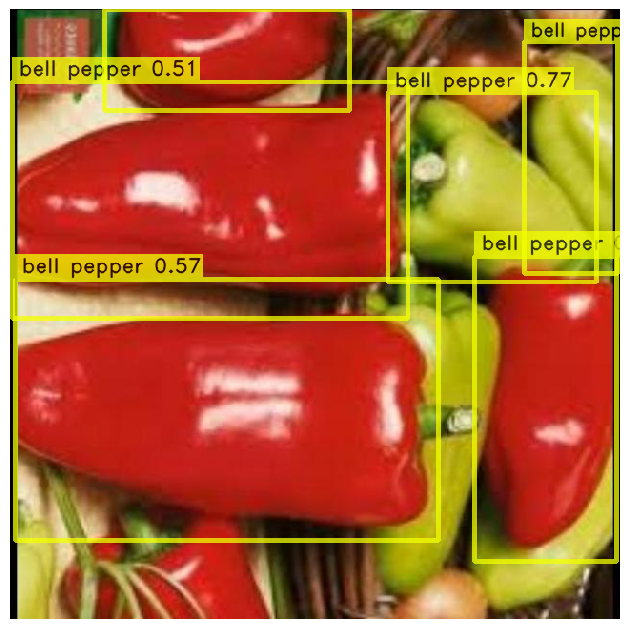

In [ ]:
img_url = '/content/Retail-Store-1/test/images/-3_jpg.rf.46203532406485ddf6044cf475802887.jpg'
best_model.predict(img_url).show()